In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import akshare as ak

# 获取上证指数的历史数据
data = ak.stock_zh_index_daily(symbol="sh000001")

# 显示前五行数据
print(df.head())

# Step 2: Save to CSV file
data.to_csv("./data/sh000001.csv", index=False, encoding="utf-8-sig")

print("Data saved to sh000001.csv successfully.")


         date    open    high     low   close  volume
0  1990-12-19   96.05   99.98   95.79   99.98  126000
1  1990-12-20  104.30  104.39   99.98  104.39   19700
2  1990-12-21  109.07  109.13  103.73  109.13    2800
3  1990-12-24  113.57  114.55  109.13  114.55    3200
4  1990-12-25  120.09  120.25  114.55  120.25    1500
Data saved to sh000001.csv successfully.


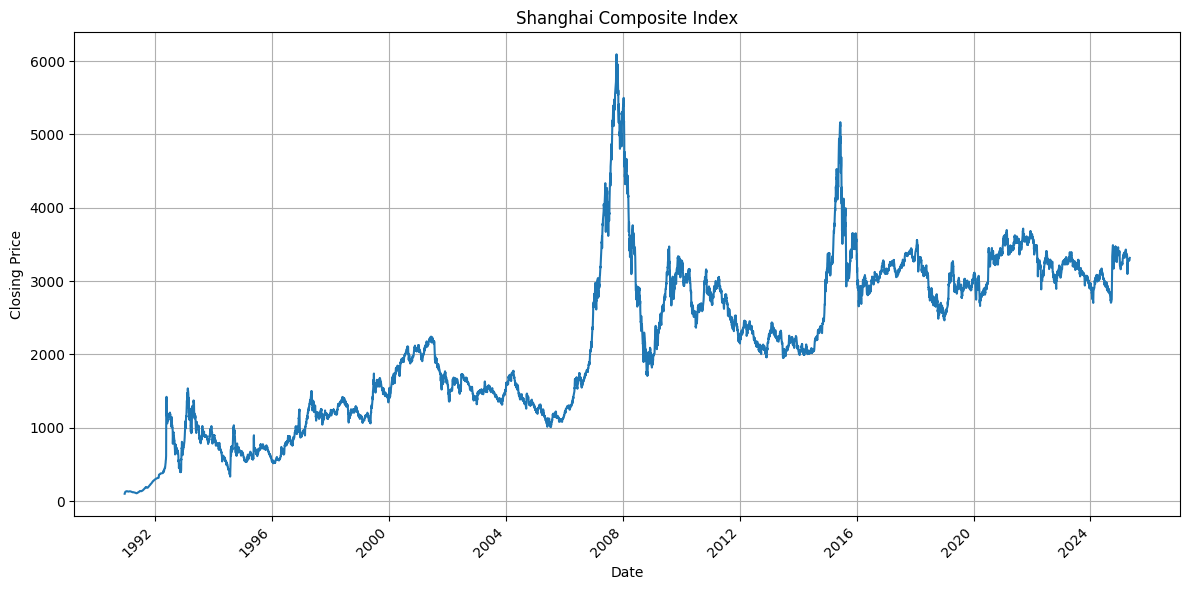

In [12]:
import pandas as pd

# Step 1: Load the CSV file
df = pd.read_csv("./data/sh000001.csv")

# Step 2: Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Step 3: (Optional) Set 'date' as index for easier plotting
df.set_index('date', inplace=True)

# Step 3: Plot with date on x-axis
df['close'].plot(title="Shanghai Composite Index", figsize=(12, 6))
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)

# Optional: Rotate date labels
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Total invested: ¥414000.00
Portfolio value: ¥1137348.89
Profit: ¥723348.89 (174.72%)


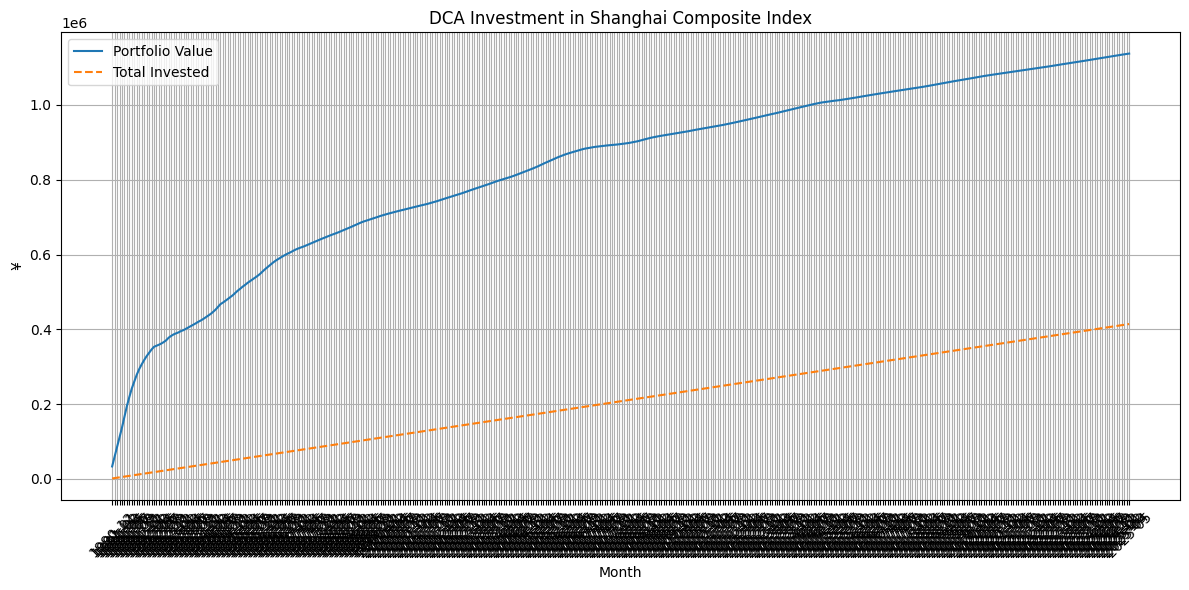

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("./data/sh000001.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Extract year-month for grouping
df['month'] = df['date'].dt.to_period('M')

# Get the first trading day of each month
monthly_df = df.groupby('month').first().reset_index()

# DCA logic
investment_per_month = 1000  # ¥1000 per month
monthly_df['shares_bought'] = investment_per_month / monthly_df['close']
monthly_df['total_shares'] = monthly_df['shares_bought'].cumsum()
monthly_df['total_invested'] = investment_per_month * (monthly_df.index + 1)

# Use latest price to calculate current value
latest_price = df['close'].iloc[-1]
monthly_df['portfolio_value'] = monthly_df['total_shares'] * latest_price

# Final result
total_invested = monthly_df['total_invested'].iloc[-1]
portfolio_value = monthly_df['portfolio_value'].iloc[-1]
profit = portfolio_value - total_invested

print(f"Total invested: ¥{total_invested:.2f}")
print(f"Portfolio value: ¥{portfolio_value:.2f}")
print(f"Profit: ¥{profit:.2f} ({profit / total_invested:.2%})")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_df['month'].astype(str), monthly_df['portfolio_value'], label='Portfolio Value')
plt.plot(monthly_df['month'].astype(str), monthly_df['total_invested'], label='Total Invested', linestyle='--')
plt.title("DCA Investment in Shanghai Composite Index")
plt.xlabel("Month")
plt.ylabel("¥")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
